**Задание 1**

Используйте файл с оценками фильмов ml-latest-small/ratings.csv. Посчитайте среднее время жизни пользователей, которые выставили более 100 оценок. Под временем жизни понимается разница между максимальным и минимальным значением столбца timestamp для данного значения userId.


In [ ]:
import pandas as pd
import datetime

In [88]:
rating = pd.read_csv('ml-latest-small/ratings.csv')

In [150]:
rating = pd.read_csv('ratings.csv') #большой 600мб сет для проверки гипотезы ниже

In [151]:
#вариант 1 (забыл про join-ы)
g = rating.groupby('userId')
g2 = g.count()
g2['dif'] = g.timestamp.max() - g.timestamp.min()
print(f"""Среднее время жизни пользователей с более 100 оценками {pd.Timedelta(str(int(g2[g2.rating > 100].dif.mean()))+'seconds')} """)

Среднее время жизни пользователей с более 100 оценками 494 days 04:25:49 


In [131]:
#вариант 2 с join-ами

rating['date'] = rating.timestamp.apply(lambda x: pd.Timestamp(x, unit='s'))
r = rating.groupby('userId')
rate_count = r.count().join(r.max().date, rsuffix ='_max').join(r.min().date, rsuffix ='_min')
rate_count['dif'] = rate_count.date_max-rate_count.date_min
rate_count[r.rating.count() > n].dif.mean()
rate_count

In [164]:
print(f'Среднее время жизни пользователей с более 100 оценками {rate_count[r.rating.count() > 100].dif.mean()}')

Среднее время жизни пользователей с более 100 оценками 494 days 04:25:49.007733


In [172]:
#проверка гипотезы о ботах в базе
import numpy as np

In [200]:
d = 1000
q = rate_count[r.rating.count() > d].dif.min().total_seconds()
print(f'максимальная скорость  оценки фильмов пользователя {round(d/q,1)} фильмов в секунду при минимуме {d} оценок')

максимальная скорость  оценки фильмов пользователя 142.9 фильмов в секунду при минимуме 1000 оценок


In [230]:
n1 = []
q1 = []
v1 = []
for n in range(1000,10000,100):
    q = rate_count[r.rating.count() > n].dif.min().total_seconds()
    n1.append(n)
    q1.append(q)
#     v1.append(n\q)
#     print(f'максимальная скорость оценки фильмов пользователем {round(n/q,6)} фильмов в секунду при минимуме {n} оценок')    

min_livetime = pd.DataFrame(
    {
        'min_user_rating_count': n1,
        'min_livetime_sec': q1
    }
)

min_livetime['Max_films_in_second'] = min_livetime['min_user_rating_count'] / min_livetime['min_livetime_sec']
min_livetime


,min_user_rating_count,min_livetime_sec,Max_films_in_second
0,1000,7.0,142.857143
1,1100,10.0,110.000000
2,1200,14.0,85.714286
3,1300,14.0,92.857143
4,1400,20.0,70.000000
...,...,...,...
85,9500,120366662.0,0.000079
86,9600,120366662.0,0.000080
87,9700,120366662.0,0.000081
88,9800,120366662.0,0.000081


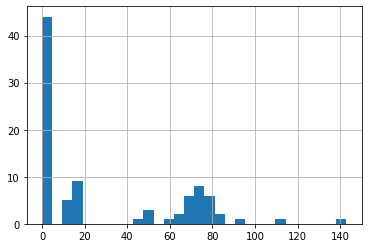

In [234]:
%matplotlib inline
min_livetime['Max_films_in_second'].hist(bins=30)

По графику видно, что основная масса пользователей похожа на реальных людей со средней скоростью оценки ниже одной  в секунду. 

Но на графике также явно заметны несколько групп пользователей с медианами 15 и 70 оценок в секунду, которые, вследствие высокой скорости, предположительно, не являются реальными людьми. 

Возможно это алгоритмы, оценочные боты, ошибки базы или неправильная методика расчета.

**Задание 2**

Дана статистика услуг перевозок клиентов компании по типам (см. файл с кодом занятия). Необходимо сформировать две таблицы:
таблицу с тремя типами выручки для каждого client_id без указания адреса клиента
аналогичную таблицу по типам выручки с указанием адреса клиента
Обратите внимание, что в процессе объединения таблиц данные не должны теряться.



In [ ]:
Дана статистика услуг перевозок клиентов компании по типам:

rzd - железнодорожные перевозки
auto - автомобильные перевозки
air - воздушные перевозки
client_base - адреса клиентов

In [253]:
rzd = pd.DataFrame({'client_id': [111, 112, 113, 114, 115],
                    'rzd_revenue': [1093, 2810, 10283, 5774, 981]})

auto = pd.DataFrame({'client_id': [113, 114, 115, 116, 117],
                     'auto_revenue': [57483, 83, 912, 4834, 98]})

air = pd.DataFrame({'client_id': [115, 116, 117, 118],
                    'air_revenue': [81, 4, 13, 173]})

client_base = pd.DataFrame({'client_id': [111, 112, 113, 114, 115, 116, 117, 118],
                            'address': ['Комсомольская 4', 'Энтузиастов 8а', 'Левобережная 1а', 'Мира 14', 'ЗЖБИиДК 1', 
                                        'Строителей 18', 'Панфиловская 33', 'Мастеркова 4']})

tab1 = rzd.merge(auto, how='outer').merge(air, how='outer')
tab2=tab1.merge(client_base, how='outer')

print(tab1, '\n\n', tab2)


   client_id  rzd_revenue  auto_revenue  air_revenue
0        111       1093.0           NaN          NaN
1        112       2810.0           NaN          NaN
2        113      10283.0       57483.0          NaN
3        114       5774.0          83.0          NaN
4        115        981.0         912.0         81.0
5        116          NaN        4834.0          4.0
6        117          NaN          98.0         13.0
7        118          NaN           NaN        173.0 

    client_id  rzd_revenue  auto_revenue  air_revenue          address
0        111       1093.0           NaN          NaN  Комсомольская 4
1        112       2810.0           NaN          NaN   Энтузиастов 8а
2        113      10283.0       57483.0          NaN  Левобережная 1а
3        114       5774.0          83.0          NaN          Мира 14
4        115        981.0         912.0         81.0        ЗЖБИиДК 1
5        116          NaN        4834.0          4.0    Строителей 18
6        117          NaN     

**Задание 3**

В задаче сквозной аналитики вам предоставили данные по местоположению пользователей. Т. е. для каждого user_id известна последовательность координат (широта/долгота), когда они требовались приложению для полноценной работы. Как бы вы добавили эти сведения в таблицу визитов и покупок? Для составления ответа можно использовать вопросы:
У каждого пользователя известен набор координат. А для связывания с визитом или фактом покупки скорее всего потребуется одно-два числа. Как их получить?
Наборы координат одного и того же пользователя могут быть значительно удалены друг от друга. Как это отразится на вопросе расчетах пункта 1?
Какие дополнительные признаки можно получить из координат? Ведь это просто числа, которые сами по себе мало что дают.

Непонятно, есть ли время получения координат. Предположим худший вариант, что нет.

Можно сопостовлять координаты пользователя с координатами списка интересующих регионов (города, районы, страны, округа) и использовать номер региона.

Можно вычислить различные метрики передвижения пользователя(например мобильность) и добавлять значение каждой значимой метрики.

Много можно всего придумать если понимать направление приложения и видеть реальные данные.